In [18]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=55

In [19]:
with open('data_preprocessed.pkl', 'rb') as f:
    data=pickle.load(f)

In [20]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode,Customer FullName,order_month,order_week_day,order_hour
0,DEBIT,3,4,91.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,77202,13.110000,0.04,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,Standard Class,CallyHolloway,1,2,22
1,TRANSFER,5,4,-249.089996,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Luna,Consumer,PR,2679 Rustic Loop,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,75939,16.389999,0.05,-0.80,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,Standard Class,IreneLuna,1,5,12
2,CASH,4,4,-247.779999,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Maldonado,Consumer,CA,8510 Round Bear Gate,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,75938,18.030001,0.06,-0.80,1,327.75,South Asia,Rajastán,CLOSED,Smart watch,327.75,Standard Class,GillianMaldonado,1,5,12
3,DEBIT,3,4,22.860001,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Tate,Home Office,CA,3200 Amber Bend,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,75937,22.940001,0.07,0.08,1,327.75,Oceania,Queensland,COMPLETE,Smart watch,327.75,Standard Class,TanaTate,1,5,11
4,PAYMENT,2,4,134.210007,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,75936,29.500000,0.09,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,Standard Class,OrliHendricks,1,5,11


In [21]:
# 查看数值类型的取值
# 怎么这么整齐？？？
num_cols = data.select_dtypes(exclude='object').columns
for col in num_cols:
    print(col, len(data[col].value_counts()))

Days for shipping (real) 7
Days for shipment (scheduled) 4
Benefit per order 21998
Late_delivery_risk 2
Category Id 51
Customer Id 20652
Department Id 11
Latitude 11250
Longitude 4487
Order Id 65752
Order Item Discount 1017
Order Item Discount Rate 18
Order Item Profit Ratio 162
Order Item Quantity 5
Sales 193
Product Price 75
order_month 12
order_week_day 7
order_hour 24


In [22]:
# Sales 和 Product Price是不一样的
(data['Sales']==data['Product Price']).sum() / data.shape[0]

0.5491610301408716

In [23]:
# 查看object type的特征有几种取值
one_hot_cols = []                         # 取值少于5的做one hot encode
label_encode_cols = []                    # 否则 label encode
for i in data.select_dtypes('object').columns:
    value_ = len(data[i].value_counts())
    if value_ <= 5:
        one_hot_cols.append(i)
    else :
        label_encode_cols.append(i)
    print(i, value_)
print(one_hot_cols)
print(label_encode_cols)

Type 4
Delivery Status 4
Category Name 50
Customer City 563
Customer Country 2
Customer Lname 1110
Customer Segment 3
Customer State 46
Customer Street 7458
Department Name 11
Market 5
Order City 3597
Order Country 164
Order Region 23
Order State 1089
Order Status 9
Product Name 118
Shipping Mode 4
Customer FullName 14033
['Type', 'Delivery Status', 'Customer Country', 'Customer Segment', 'Market', 'Shipping Mode']
['Category Name', 'Customer City', 'Customer Lname', 'Customer State', 'Customer Street', 'Department Name', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'Customer FullName']


In [24]:
def col_split(data):
    # 数字类型和类别类型
    num_cols = data.select_dtypes(exclude='object').columns.tolist()

    one_hot_cols = []                         # 取值少于5的做one hot encode
    label_encode_cols = []                    # 否则 label encode
    for i in data.select_dtypes('object').columns:
        value_ = len(data[i].value_counts())
        if value_ <= 5:
            one_hot_cols.append(i)
        else :
            label_encode_cols.append(i)
    return num_cols, label_encode_cols, one_hot_cols

#### 销量预测 字段Sales

In [25]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Id', 'Customer Lname', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Region', 'Order State', 'Order Status', 'Product Name',
       'Product Price', 'Shipping Mode', 'Customer FullName', 'order_month',
       'order_week_day', 'order_hour'],
      dtype='object')

In [26]:
sales_x = data.loc[:, data.columns != 'Sales']
sales_y = data['Sales']

In [27]:
sales_x.shape, sales_y.shape

((180519, 37), (180519,))

##### 订单数量预测 Order Item Quantity

In [28]:
quantity_x = data.loc[:, data.columns != 'Order Item Quantity']
quantity_y = data['Order Item Quantity']

In [29]:
quantity_x.shape, quantity_y.shape

((180519, 37), (180519,))

#### 预处理

In [30]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def data_scale(data, label_encode_cols, num_cols):
    for i in label_encode_cols:
        lbe = LabelEncoder()
        data[i] = lbe.fit_transform(data[i])

    mns = MinMaxScaler()
    data[num_cols] = mns.fit_transform(data[num_cols])

    ## 剩下的，get_dummies
    data = pd.get_dummies(data)
    return data

#### 思考：做完labelencode后需不需要scaler???FullName有一万多种类，那量纲相对于数值类型(已做归一化)的就相差很大。

In [31]:
# def data_scale_(data, label_encode_cols, num_cols):
#     for i in label_encode_cols:
#         lbe = LabelEncoder()
#         data[i] = lbe.fit_transform(data[i])
    
#     #### label_encode_cols也做minmaxscale
#     num_cols.extend(label_encode_cols)
    
#     mns = MinMaxScaler()
#     data[num_cols] = mns.fit_transform(data[num_cols])

#     ## 剩下的，get_dummies
#     data = pd.get_dummies(data)
#     return data

# 效果不太好

In [32]:
num_cols, label_encode_cols, one_hot_cols = col_split(data=sales_x)
sales_x = data_scale(sales_x, label_encode_cols=label_encode_cols, num_cols=num_cols)

num_cols, label_encode_cols, one_hot_cols = col_split(data=quantity_x)
quantity_x = data_scale(quantity_x, label_encode_cols=label_encode_cols, num_cols=num_cols)

e:\tool\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
e:\tool\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
e:\tool\python36\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

#### 回归用不了StratifiedKFold

In [78]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error

# 切分训练集和测试集
# 将训练集再利用KFold切分成训练集和验证集，得到K个模型，并分别对测试集进行预测，以各模型的mse设置K个模型的权重

def training(model, data, label, n):
    prediction=[]
    mae_list = []
    # 切分训练集测试集
    x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2)
    
     # 用Kfold验证，并根据mse进行模型融合
    kf = KFold(n_splits=5)
    for train_index, val_index in kf.split(x_train):
        train_x, val_x = x_train.iloc[train_index], x_train.iloc[val_index]
        train_y, val_y = y_train.iloc[train_index], y_train.iloc[val_index]
        # 模型训练
        model.fit(train_x, train_y)
        # 验证
        y_pred = model.predict(val_x)
        mae = mean_absolute_error(val_y, y_pred)
        mae_list.append(mae) # 根据验证集得到每个模型的权重(基于mse)
        
        # 模型预测
        pred = model.predict(x_test)
        prediction.append(pred)

    # 均分。     
    w = 1/5
    prediction =  sum(prediction) * w      # [(1-mae_list[i]/sum(mae_list)/2)*prediction[i] for i in range(n)]
    #print(prediction)
    
    
#    根据mse进行模型融合还要学习
#     pred_=0
#     for i in range(n):
#         w = (1-mae_list[i]/sum(mae_list))/(n-1)
#         pred_ += w*prediction[i]
#     print(mae_list)
    
    print('MAE:',mean_absolute_error(y_test, prediction))  
    print('RMSE:', mean_squared_error(y_test, prediction)**0.5)

    ## 全量
#     model.fit(x_train, y_train)
#     prediction = model.predict(x_test)
#     print('MAE:',mean_absolute_error(y_test, prediction))  
#     print('RMSE:', mean_squared_error(y_test, prediction)**0.5)

    return model

In [79]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
print('Sales Prediction!!!')
xgb_sale = training(xgb_reg, sales_x, sales_y, n=5)
print('Quantity Prediction!!!')
xgb_quantity = training(xgb_reg, quantity_x, quantity_y, n=5)

Sales Prediction!!!
MAE: 0.010689861136940964
RMSE: 0.06270509891498569
Quantity Prediction!!!
MAE: 3.9296859902974216e-05
RMSE: 0.0005572836406265908


#### Sales 特征重要性分析

<AxesSubplot:xlabel='feature'>

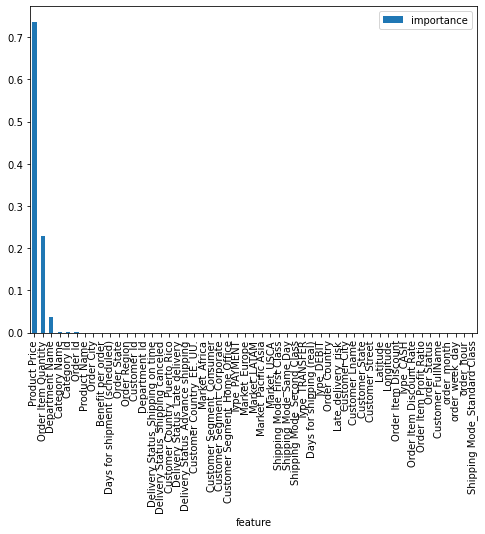

In [83]:
sales_fea_imp = pd.DataFrame({'feature':sales_x.columns,'importance':xgb_sale.feature_importances_}).set_index('feature').sort_values(by='importance', ascending=False)
sales_fea_imp.plot(kind='bar', figsize=(8,6))

#### Quantity特征重要性分析

<AxesSubplot:xlabel='feature'>

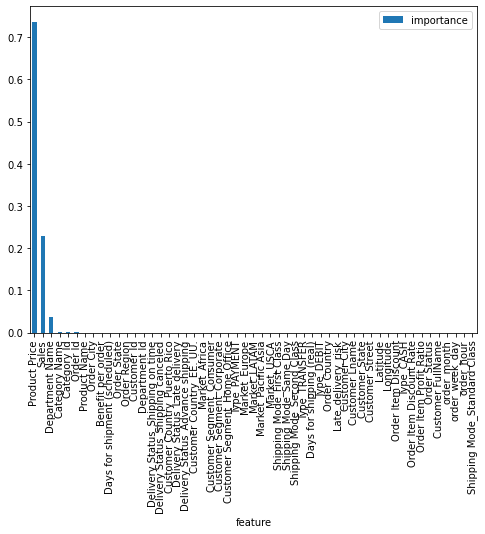

In [84]:
quantity_fea_imp = pd.DataFrame({'feature':quantity_x.columns,'importance':xgb_quantity.feature_importances_}).set_index('feature').sort_values(by='importance', ascending=False)
quantity_fea_imp.plot(kind='bar', figsize=(8,6))

#### 从上面的特征重要性分析可以发现，前六个特征相对比较重要，因此，我们利用前六个特征重新训练XGB，查看预测效果

In [87]:
xgb_reg = XGBRegressor()
print('Sales Prediction!!!')
xgb_sale = training(xgb_reg, sales_x[sales_fea_imp.index[:6]], sales_y, n=5)
print('Quantity Prediction!!!')
xgb_quantity = training(xgb_reg, quantity_x[quantity_fea_imp.index[:6]], quantity_y, n=5)

Sales Prediction!!!
MAE: 0.003110561609215714
RMSE: 0.01988915793810265
Quantity Prediction!!!
MAE: 3.44713732563892e-05
RMSE: 0.0001416170670506149


* 全量特征

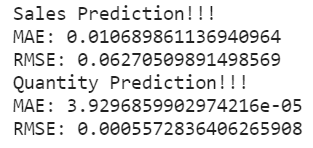

#### 可以发现相比于全量特征，只利用前六个重要特征进行训练的预测效果有了明显的提升！！！

#### 说明之前的特征是有冗余的，导致了模型并没有发挥出更好的作用